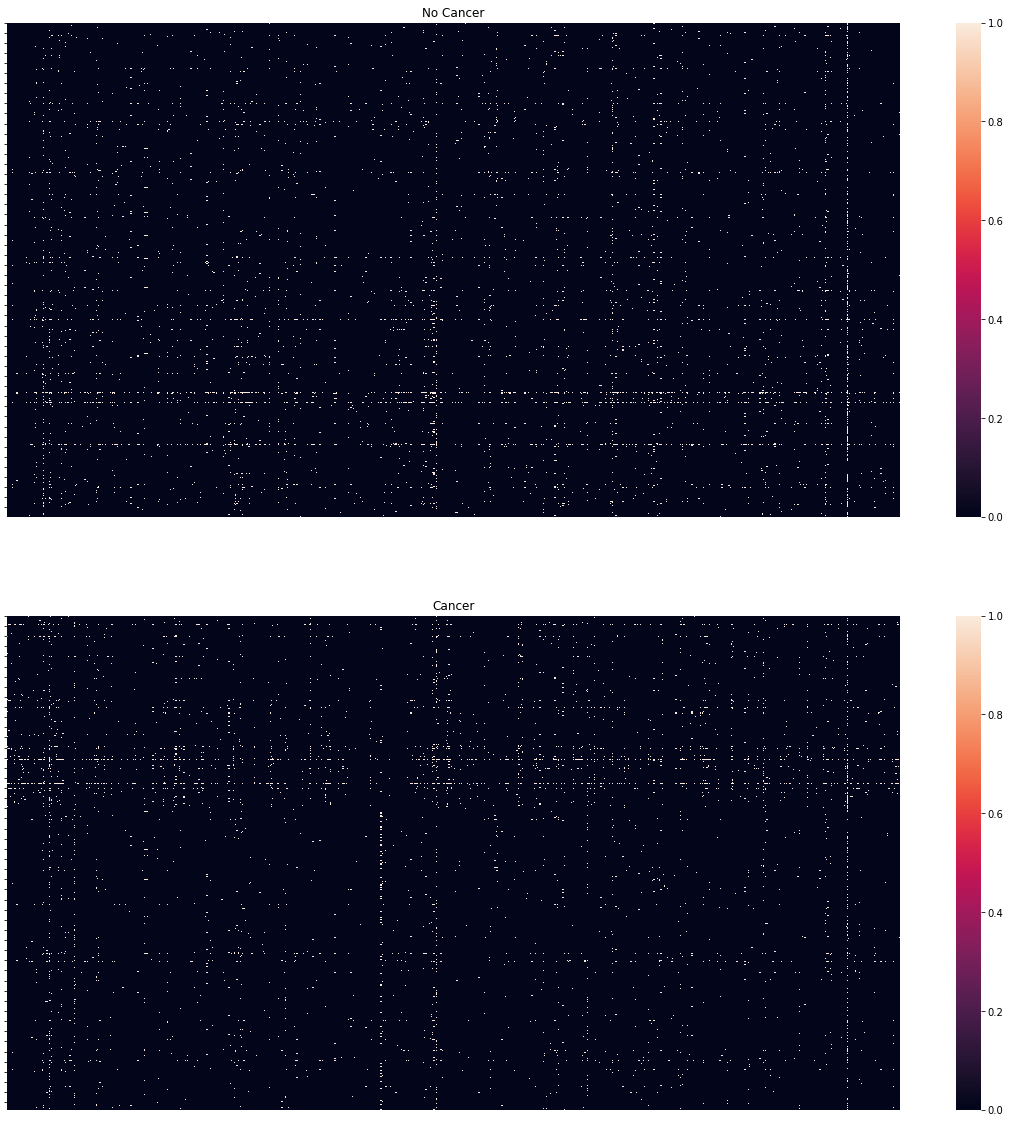

In [2]:
# Copyright (C) 2022 Greenweaves Software Limited

# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This software is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.

# You should have received a copy of the GNU General Public License
# along with GNU Emacs.  If not, see <http://www.gnu.org/licenses/>

from os.path           import join
from matplotlib.pyplot import figure, savefig, show, title
from pandas            import read_csv
from seaborn           import heatmap

def read_and_split(path      = r'G:\My Drive\Machine Learning\Cholangiocarcinoma_ML\Data Files',
                   file_name = 'cancer_mutations',
                   ext       = 'txt'):
    df         = read_csv(join(path,f'{file_name}.{ext}'), sep='\t')
    cancer0    = df.loc[df.cancer_type==0,].drop(['cancer_type'],
                     axis    = 1,
                     inplace = False)
    cancer1    = df.loc[df.cancer_type==1,].drop(['cancer_type'],
                     axis    = 1,
                     inplace = False)
    return (cancer0,cancer1)

def decorate_plot(ax    = None,
                  title = 'Cancer'):
    ax.set_title(title)
    ax.tick_params(which       = 'both',
                   bottom      = False,
                   top         = False,
                   labelleft   = False,
                   labelbottom = False )

if __name__=='__main__':
    cancer0,cancer1 = read_and_split()
    fig             = figure(figsize=(20,20))
    axs             = fig.subplots(2)
    decorate_plot(ax    = axs[0],
                  title = 'No Cancer')
    heatmap(cancer0,
            ax   = axs[0],
            vmin = 0,
            vmax = 1)
    decorate_plot(ax    = axs[1],
                  title = 'Cancer')
    heatmap(cancer1,
            ax   = axs[1],
            vmin = 0,
            vmax = 1)
    #savefig('cancerEDA.png')
    show()